In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Spotify Dataset
df = pd.read_csv("songs_normalize.csv")

# Check the first few rows of the dataset to understand its structure
print("Dataset Sample:")
print(df.head())

Dataset Sample:
           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000       

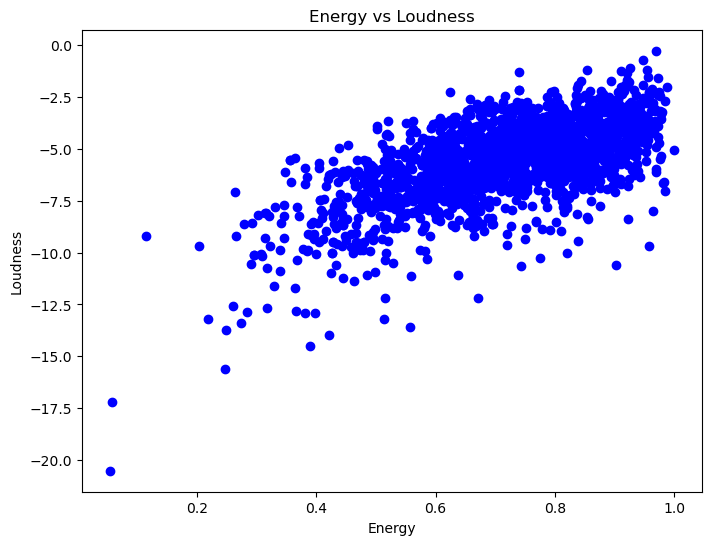

In [2]:
# Select features for Simple Linear Regression
# Independent variable: 'energy'; Dependent variable: 'loudness'
X = df[['energy']]
y = df['loudness']

# Visualize the relationship between energy and loudness
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue')
plt.title("Energy vs Loudness")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1600, 1)
Testing set shape: (400, 1)


In [4]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Retrieve the intercept and slope
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept (b0):", intercept)
print("Slope (b1):", slope)

# Predict values using the trained model
y_pred = model.predict(X_test)

Intercept (b0): -11.457693277216634
Slope (b1): 8.28937620899175


In [5]:
# Compare the predicted and actual values for a sample
comparison_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print("\nSample Actual vs Predicted values:")
print(comparison_df.head())

# Evaluate the algorithm
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Sample Actual vs Predicted values:
   Actual  Predicted
0  -5.253  -6.807353
1  -3.846  -4.718430
2  -5.441  -4.643826
3  -3.970  -5.315266
4  -8.558  -7.793789

Mean Squared Error (MSE): 2.2001619436888347
R-squared (R2): 0.3879223311053126


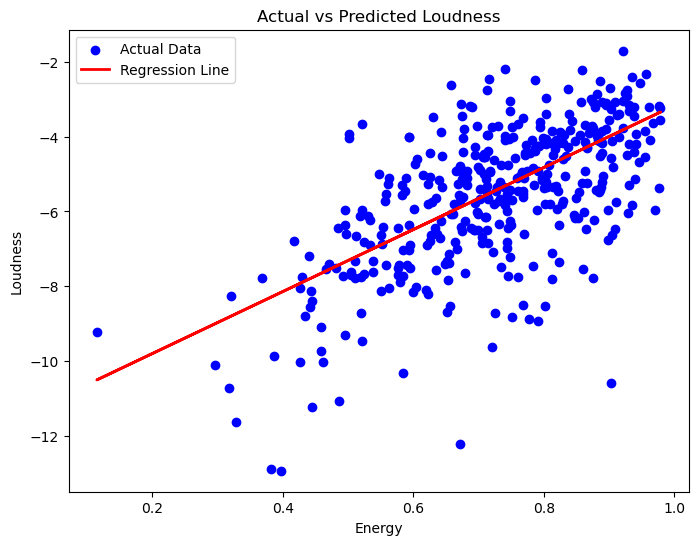

In [6]:
# Visualization of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Actual vs Predicted Loudness")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.legend()
plt.show()

In [ ]:
# OBSERVATIONS
# 1. Intercept and Slope: The regression equation can be interpreted as Loudness = Intercept + (Slope * Energy).
# 2. Model Performance:
#     - MSE provides a measure of prediction errors; a lower value is preferable.
#     - R-squared indicates the percentage of variance in the dependent variable explained by the independent variable. 
# 3. Relationship Visualization: The scatter plot shows the fit of the regression line to the actual data.

# CONCLUSION
# The simple linear regression analysis shows a linear relationship between the energy and loudness features of the Spotify dataset. 
# The model's performance can be improved by adding more features or using advanced algorithms.

In [ ]:
#Arjun Ajithan Nadukandiyil
#2241119
#6BCA B